DSC761 Advanced Data Science Technology - Data Science Project

---



Group G Team Members and Roles Assigned

---



1.   Mohammad Syazwan bin Onn (2021191989)
      *  Data Extraction from Hive to .csv file
      *  Data Preparation and Transformation
2.   Nur Amalina binti Ahmad Fuzi (2021776013)
      *  Data Understanding - Exploratory Data Analysis
      *  Models Development

3.   Fathin 'Athirah binti Jamallodin
(2019844932)
      *  Literature Review on Machine Learning Algorithms
      *  Models Development

4.   Bustamam bin Daud (2021509129)
      *  Models Evaluation











# **A) RETRIEVING DEPENDENCIES & DATASET**
Dependencies are imported to enable operations on the dataset. For example Pandas for importing .csv file into dataframe, Numpy is for calculation operation, Seaborn and Matplotlib for data visualization and Scipy for statistics operation.
Imported dataset has no appropriate column names. Therefore the columns are splitted and renamed.


RETRIEVING DEPENDENCIES & DATASET

In [1]:
#import dependencies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

Imported dataset being split using str.split operation, and being split using comma and expanded to 24 columns.

In [2]:
#read csv file

df = pd.read_csv("dataset_task_events_2011.csv")
df = df['att0'].str.split(',',expand=True)

The imported dataset named as df, and the condition is checked.

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,11477,1.95985951431E11,6.275743777E9,434.0,4.31045968E8,0.0,0.0,1.0,0.0625,0.0318,1.926E-4,0.0,0.005484,0.0016098000000000002,0.0026533999999999998,3.2978E-4,0.001024,0.003304,4.8898E-4,9.537E-7,0.0752,0.02707,10.3958,0.038474
1,11478,1.96036658975E11,6.276129734E9,109.0,3.51662796E8,1.0,0.0,0.0,0.006248,0.004135,3.862E-4,0.0,0.0010563600000000001,3.09E-4,4.86E-4,2.614E-5,5.169E-4,0.002167,3.84866E-4,0.0,0.05078,0.06152,3.4913333333333334,0.012717833333333333
2,11479,1.86075674353E11,6.258695096E9,106.0,1271316.0,0.0,1.0,9.0,0.06873,0.07959,5.817E-5,0.0,0.0029481666666666666,4.443333333333333E-4,0.0019379999999999998,2.1996666666666668E-4,0.00104,0.003075,0.016089333333333334,2.861E-6,0.04694,0.06714,1.217,0.001874
3,11481,1.86213606972E11,6.274750006E9,408.0,905614.0,0.0,0.0,0.0,0.04999,0.04773,7.725E-5,0.0,0.11957675,0.033778333333333334,0.035145166666666665,5.283333333333333E-4,0.001816,0.05695,0.0016780641666666665,8.583E-6,0.4507,0.0675,0.94619,6.0695E-4
4,11482,1.86228313092E11,6.114773114E9,368.0,2.07915516E8,0.0,0.0,0.0,0.0125,0.007767,4.044E-4,0.0,2.053225E-4,0.00131532475,0.001796975,1.891625E-4,5.379E-4,0.001869,3.658183225E-4,0.0,0.01602,0.04572,4.7277249999999995,0.016459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4299,9.4234979807E10,6.2218618E9,19798.0,1.82193405E8,0.0,0.0,0.0,0.0125,0.0159,4.044E-4,0.0,0.0022491,1.7323666666666667E-4,6.433333333333333E-4,4.830666666666666E-5,2.031E-4,9.975E-4,0.0030778666666666666,9.537E-7,0.05615,0.02658,1.192,6.343E-4
9996,4304,9.4254390462E10,6.2218618E9,13632.0,6567816.0,0.0,0.0,0.0,0.0125,0.0159,4.044E-4,0.0,6.627E-4,6.31775E-5,7.2595E-4,9.5375E-6,4.387E-5,7.038E-4,8.849999999999999E-4,9.537E-7,0.04791,0.01021,0.725,2.899E-4
9997,4305,9.4257821233E10,6.2218618E9,8467.0,1268808.0,0.0,0.0,0.0,0.0125,0.0159,4.044E-4,0.0,4.4203499999999996E-4,1.161E-4,9.705E-4,5.5085E-5,2.594E-4,7.143E-4,0.00158925,9.537E-7,0.02267,0.02985,1.5267499999999998,0.003322475
9998,4306,9.4261378954E10,6.258858324E9,585.0,3.338579772E9,1.0,0.0,0.0,0.009369,0.008759,7.534E-4,0.0,6.5226E-4,6.768000000000001E-4,0.0012986,3.0460000000000003E-4,0.001419,0.002155,0.0028061458,0.0,0.01917,0.05151,2.254125,0.00631275


The columns are renamed, according to the obtained data from table in cloudpro database.

In [4]:
#rename column

df1 = df.set_axis(['att0', 'timestamp_', 'job_id', 'task_index', 'machine_id','event_type',
                   'scheduling_class', 'priority', 'cpu_request',
                   'memory_request', 'disk_space_request',
                   'different_machine_restriction', 'cpu_rate',
                   'canonical_memory_usage', 'assigned_memory_usage',
                   'unmapped_page_cache', 'total_page_cache',
                   'maximum_memory_usage', 'disk_i_o_time',
                   'local_disk_space_usage', 'maximum_cpu_rate',
                   'maximum_disk_i_o_time', 'cycles_per_instruction',
                   'memory_access_per_instruction'], axis=1, inplace=False)

The dataframe being renamed as df1 and condition of the dataframe is checked. 
The columns successfully renamed and has 10000 rows altogether.

In [5]:
df1

,att0,timestamp_,job_id,task_index,machine_id,event_type,scheduling_class,priority,cpu_request,memory_request,disk_space_request,different_machine_restriction,cpu_rate,canonical_memory_usage,assigned_memory_usage,unmapped_page_cache,total_page_cache,maximum_memory_usage,disk_i_o_time,local_disk_space_usage,maximum_cpu_rate,maximum_disk_i_o_time,cycles_per_instruction,memory_access_per_instruction
0,11477,1.95985951431E11,6.275743777E9,434.0,4.31045968E8,0.0,0.0,1.0,0.0625,0.0318,1.926E-4,0.0,0.005484,0.0016098000000000002,0.0026533999999999998,3.2978E-4,0.001024,0.003304,4.8898E-4,9.537E-7,0.0752,0.02707,10.3958,0.038474
1,11478,1.96036658975E11,6.276129734E9,109.0,3.51662796E8,1.0,0.0,0.0,0.006248,0.004135,3.862E-4,0.0,0.0010563600000000001,3.09E-4,4.86E-4,2.614E-5,5.169E-4,0.002167,3.84866E-4,0.0,0.05078,0.06152,3.4913333333333334,0.012717833333333333
2,11479,1.86075674353E11,6.258695096E9,106.0,1271316.0,0.0,1.0,9.0,0.06873,0.07959,5.817E-5,0.0,0.0029481666666666666,4.443333333333333E-4,0.0019379999999999998,2.1996666666666668E-4,0.00104,0.003075,0.016089333333333334,2.861E-6,0.04694,0.06714,1.217,0.001874
3,11481,1.86213606972E11,6.274750006E9,408.0,905614.0,0.0,0.0,0.0,0.04999,0.04773,7.725E-5,0.0,0.11957675,0.033778333333333334,0.035145166666666665,5.283333333333333E-4,0.001816,0.05695,0.0016780641666666665,8.583E-6,0.4507,0.0675,0.94619,6.0695E-4
4,11482,1.86228313092E11,6.114773114E9,368.0,2.07915516E8,0.0,0.0,0.0,0.0125,0.007767,4.044E-4,0.0,2.053225E-4,0.00131532475,0.001796975,1.891625E-4,5.379E-4,0.001869,3.658183225E-4,0.0,0.01602,0.04572,4.7277249999999995,0.016459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4299,9.4234979807E10,6.2218618E9,19798.0,1.82193405E8,0.0,0.0,0.0,0.0125,0.0159,4.044E-4,0.0,0.0022491,1.7323666666666667E-4,6.433333333333333E-4,4.830666666666666E-5,2.031E-4,9.975E-4,0.0030778666666666666,9.537E-7,0.05615,0.02658,1.192,6.343E-4
9996,4304,9.4254390462E10,6.2218618E9,13632.0,6567816.0,0.0,0.0,0.0,0.0125,0.0159,4.044E-4,0.0,6.627E-4,6.31775E-5,7.2595E-4,9.5375E-6,4.387E-5,7.038E-4,8.849999999999999E-4,9.537E-7,0.04791,0.01021,0.725,2.899E-4
9997,4305,9.4257821233E10,6.2218618E9,8467.0,1268808.0,0.0,0.0,0.0,0.0125,0.0159,4.044E-4,0.0,4.4203499999999996E-4,1.161E-4,9.705E-4,5.5085E-5,2.594E-4,7.143E-4,0.00158925,9.537E-7,0.02267,0.02985,1.5267499999999998,0.003322475
9998,4306,9.4261378954E10,6.258858324E9,585.0,3.338579772E9,1.0,0.0,0.0,0.009369,0.008759,7.534E-4,0.0,6.5226E-4,6.768000000000001E-4,0.0012986,3.0460000000000003E-4,0.001419,0.002155,0.0028061458,0.0,0.01917,0.05151,2.254125,0.00631275


# **B) EXPLORATORY DATA ANALYSIS**

In this section, Exploratory Data Analysis was carried out. The operations listed as below :


1.   Identifying data type of df1
2.   identifying unique values in each column
3.   Statistical description
     *   Plotting Job Counts per Event Type
     *   Plotting count vs scheduling_class
     *   Plotting count vs different_machine_restriction
     *   Plotting count vs priority









EXPLORATORY DATA ANALYSIS

In [6]:
#identify data type of df1

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   att0                           10000 non-null  object
 1   timestamp_                     10000 non-null  object
 2   job_id                         10000 non-null  object
 3   task_index                     10000 non-null  object
 4   machine_id                     10000 non-null  object
 5   event_type                     10000 non-null  object
 6   scheduling_class               10000 non-null  object
 7   priority                       10000 non-null  object
 8   cpu_request                    10000 non-null  object
 9   memory_request                 10000 non-null  object
 10  disk_space_request             10000 non-null  object
 11  different_machine_restriction  10000 non-null  object
 12  cpu_rate                       10000 non-null  object
 13  ca

We checked the data type for all column, all variables were in object data type (character)
Conversion of data type is done using loop function: for to convert all object data type to float data type
This operation is crucial for modeling phase that requires numerical values only (i.e., Logistics Regression)


In [7]:
for column in df1:
    df1[column]=df1[column].astype(float)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   att0                           10000 non-null  float64
 1   timestamp_                     10000 non-null  float64
 2   job_id                         10000 non-null  float64
 3   task_index                     10000 non-null  float64
 4   machine_id                     10000 non-null  float64
 5   event_type                     10000 non-null  float64
 6   scheduling_class               10000 non-null  float64
 7   priority                       10000 non-null  float64
 8   cpu_request                    10000 non-null  float64
 9   memory_request                 10000 non-null  float64
 10  disk_space_request             10000 non-null  float64
 11  different_machine_restriction  10000 non-null  float64
 12  cpu_rate                       10000 non-null  

The data types are rechecked, and changes to float64 from object.

In [8]:
#identify unique values in each column

df1.nunique()

att0                             10000
timestamp_                       10000
job_id                            3896
task_index                        2940
machine_id                        6454
event_type                           2
scheduling_class                     4
priority                            10
cpu_request                        295
memory_request                     639
disk_space_request                 124
different_machine_restriction        2
cpu_rate                          9743
canonical_memory_usage            9192
assigned_memory_usage             8103
unmapped_page_cache               8538
total_page_cache                  2346
maximum_memory_usage              3167
disk_i_o_time                     9746
local_disk_space_usage             256
maximum_cpu_rate                  2783
maximum_disk_i_o_time             1423
cycles_per_instruction            9125
memory_access_per_instruction     9580
dtype: int64

*   Unique values in each column are identified
*   From the output shown, we can determine the label/target variable of our classification problem
*   event_type is the class where the job is considered as success/fail
*   In this project, since our objective is to predict which job will be success/fail, hence target variable is identified to be event_type




In [9]:
#statistic description

df1.describe()

,att0,timestamp_,job_id,task_index,machine_id,event_type,scheduling_class,priority,cpu_request,memory_request,disk_space_request,different_machine_restriction,cpu_rate,canonical_memory_usage,assigned_memory_usage,unmapped_page_cache,total_page_cache,maximum_memory_usage,disk_i_o_time,local_disk_space_usage,maximum_cpu_rate,maximum_disk_i_o_time,cycles_per_instruction,memory_access_per_instruction
count,10000.000000,1.000000e+04,1.000000e+04,10000.000000,1.000000e+04,10000.000000,10000.00000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,11175.030200,3.319378e+11,6.260285e+09,1231.952600,9.679208e+08,0.618800,0.32010,2.715600,0.035147,2.931680e-02,0.000295,0.125700,0.012294,0.005066,0.006147,0.000391,0.001979,0.011634,0.002032,1.851719e-05,0.138102,0.057152,3.873753,0.013015
std,6979.017452,1.712309e+11,1.845131e+08,2537.472723,1.440160e+09,0.485706,0.60603,2.431935,0.027993,2.906810e-02,0.000546,0.331528,0.016106,0.008979,0.009758,0.001060,0.004587,0.015291,0.002974,5.403796e-05,0.169643,0.026095,5.553901,0.025227
min,0.000000,6.248930e+08,2.818571e+07,0.000000,7.000000e+00,0.000000,0.00000,0.000000,0.000000,9.537000e-07,0.000000,0.000000,0.000000,0.000000,0.000120,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000029,0.000000,0.576675,0.000013
25%,2975.750000,2.112290e+11,6.273528e+09,86.000000,6.570786e+06,0.000000,0.00000,0.000000,0.012500,8.236000e-03,0.000038,0.000000,0.001045,0.000542,0.001183,0.000092,0.000533,0.002029,0.000377,0.000000e+00,0.047730,0.044430,1.346600,0.001883
50%,13890.500000,3.446255e+11,6.286534e+09,403.000000,3.173030e+08,1.000000,0.00000,4.000000,0.029985,2.496000e-02,0.000189,0.000000,0.005838,0.001526,0.002736,0.000177,0.000807,0.005692,0.000957,9.537000e-07,0.103450,0.057620,2.315000,0.005886
75%,17064.500000,4.805069e+11,6.298365e+09,1050.500000,1.436307e+09,1.000000,1.00000,4.000000,0.062500,3.339000e-02,0.000386,0.000000,0.018857,0.005996,0.007227,0.000302,0.001429,0.014890,0.002332,8.583000e-06,0.194800,0.066770,3.844210,0.011980
max,20080.000000,6.053934e+11,6.306300e+09,19987.000000,6.285257e+09,1.000000,3.00000,11.000000,0.312500,3.184000e-01,0.011310,1.000000,0.219845,0.165314,0.199643,0.039649,0.179400,0.214800,0.053458,1.953000e-03,6.992000,0.760700,124.969000,0.445732


*   We used describe () function to compute the statistical summary for each column in the Data Frame
*   The output is count, mean, standard deviation, minimum value, IQR values (25%, 50% & 75%), and maximum value
*   The statistical measurement output is for all variable, since they are initially converted to numerical data type



In [10]:
print(df1.shape)

(10000, 24)


Text(0, 0.5, '')

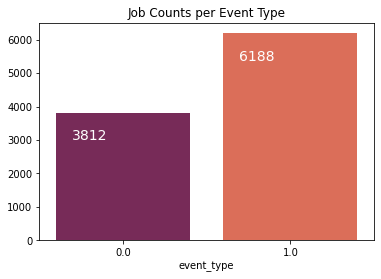

In [11]:
ax = sns.countplot(x='event_type', data=df1, palette = 'rocket')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=14)
plt.title('Job Counts per Event Type')
plt.ylabel('')

*   The visual shows the data has imbalance count between the two event_type
Count of success task is 50% higher than the number of fail task
*   The purpose of visualizing the information on imbalanced data is crucial to avoid bias prediction class



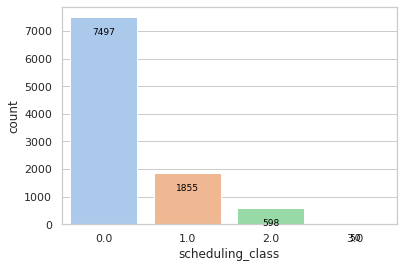

In [12]:
sns.set_theme(style="whitegrid", palette="pastel")
ax = sns.countplot(x="scheduling_class", data=df1)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()),
                ha='center', va='top', color='black', size=9)

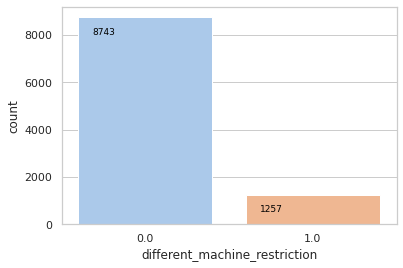

In [13]:
sns.set_theme(style="whitegrid", palette="pastel")
ax = sns.countplot(x="different_machine_restriction", data=df1)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.15, p.get_height()),
                ha='center', va='top', color='black', size=9)

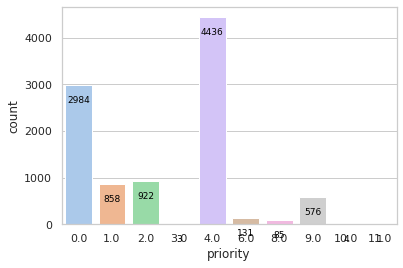

In [14]:
sns.set_theme(style="whitegrid", palette="pastel")
ax = sns.countplot(x="priority", data=df1)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()),
                ha='center', va='top', color='black', size=9)

*   The bar plot for each categorical variable is presented in this section
*   The intention is to visualize the distribution of data points in each category
*   scheduling_class variable has 4 types of class
*   Class 0.0 consists of the highest jobs followed by class 1.0, 2.0, and 3.0
*   different_machine_restriction variable has 2 types of classes (0.0 & 1.0), which more than 80% of jobs is within class 0.0
*   priority has 10 types of classes, which the highest count of jobs exist in 
class 4.0


# **C) DATA PREPARATION & TRANSFORMATION**

In this section, data is prepared to be utilized in the classification modelling. Below are the steps of Data Preparation & Transformation phase:

1.   Getting info on missing values in each column
2.   Creating histogram, Q-Q plot and boxplot for data diagnostics
3.   Visualizing diagnostic plots for each column, using histograms, Q-Q plots and boxplots.
4.   Calculating the interquantile range, IQR method is used for outlier detection
5.   Using censor method in from Winsorization, cap the upper and lower outlier.
6.   Diagnostic plots developed again for each column, to recheck whether the outlier being treated or not.
7.   Plotting heat map for checking correlations between independent variables.
8.   Dropping highly correlated features and meaningless features:-
     *   job_id
     *   memory_access_per_instruction
     *   maximum_memory_usage
     *   assigned_memory_usage
9.   Scaling all the attributes using minmaxscaler, due to inconsistant value scales for each feature.
10.  Checking multicollinearity using Variance Inflation Factor (VIF) (more than 10 will be considered to be dropped due to big sample)
8.   Checking whether target variable (event_type) imbalance or not. SMOTE operation carried out for treating imbalanced data
9.   Storing prepared dataset for modelling phase to .csv file.


DATA PREPARATION & TRANSFORMATION

In [15]:
#getting info on missing values in each column

df1.isna().sum()

att0                             0
timestamp_                       0
job_id                           0
task_index                       0
machine_id                       0
event_type                       0
scheduling_class                 0
priority                         0
cpu_request                      0
memory_request                   0
disk_space_request               0
different_machine_restriction    0
cpu_rate                         0
canonical_memory_usage           0
assigned_memory_usage            0
unmapped_page_cache              0
total_page_cache                 0
maximum_memory_usage             0
disk_i_o_time                    0
local_disk_space_usage           0
maximum_cpu_rate                 0
maximum_disk_i_o_time            0
cycles_per_instruction           0
memory_access_per_instruction    0
dtype: int64

*  No missing values in the dataset were detected. Hence, missing values elimination and imputation is not applicable.

*  In this work, the outliers were detected by using inter-quantile range (IQR), as the distributions of the data is skewed. In this method, the data points which fall below Q1 – 1.5IQR or above Q3 + 1.5IQR treated as outliers.

*  The detected outliers then treated using capping method, where the outliers of data were capped at maximum and minimum limit at below Q1 – 1.5IQR or above Q3 + 1.5IQR respectively. 

*  Outliers’ existence is visualized using histogram, Q-Q plot and boxplot using codes below, and individual features are diagnosed.


In [16]:
# create histogram, Q-Q plot and boxplot for data diagnostics

def diagnostic_plots(df1, variable):
    plt.figure(figsize=(16, 4))

    plt.subplot(1, 3, 1)
    sns.histplot(df1[variable], bins=30)
    plt.title('Histogram')

    plt.subplot(1, 3, 2)
    stats.probplot(df1[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    plt.subplot(1, 3, 3)
    sns.boxplot(y=df1[variable])
    plt.title('Boxplot')

    plt.show()

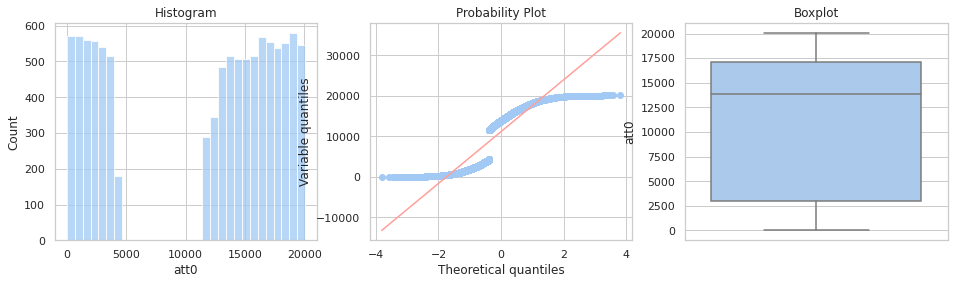

In [17]:
# diagnostic att0

diagnostic_plots(df1, 'att0')

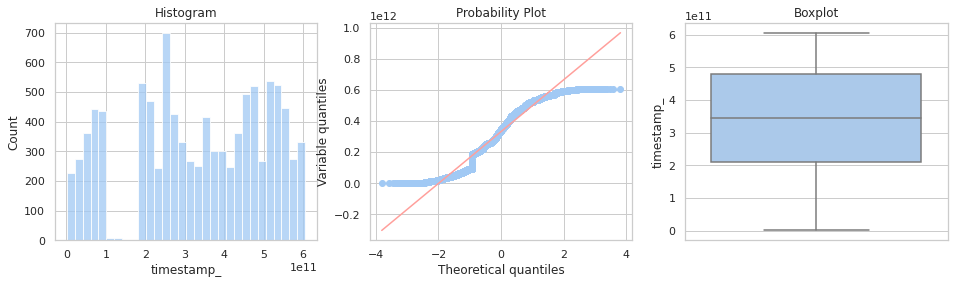

In [18]:
# diagnostic timestamp_

diagnostic_plots(df1, 'timestamp_')

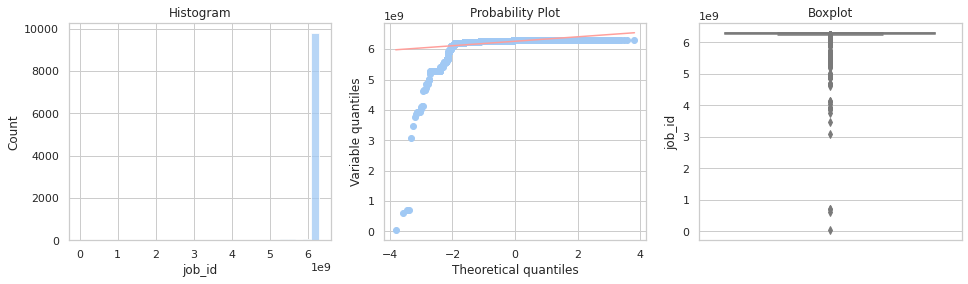

In [19]:
# diagnostic job_id

diagnostic_plots(df1, 'job_id')

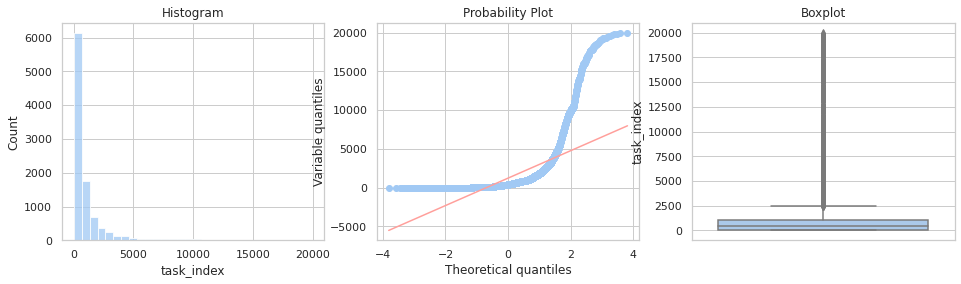

In [20]:
# diagnostic task_index

diagnostic_plots(df1, 'task_index')

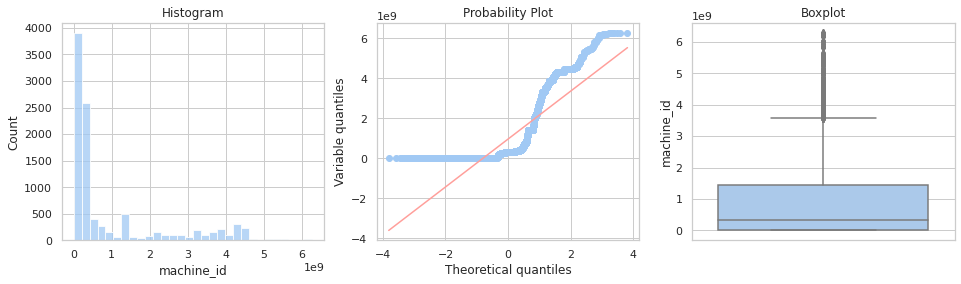

In [21]:
# diagnostic machine_id

diagnostic_plots(df1, 'machine_id')

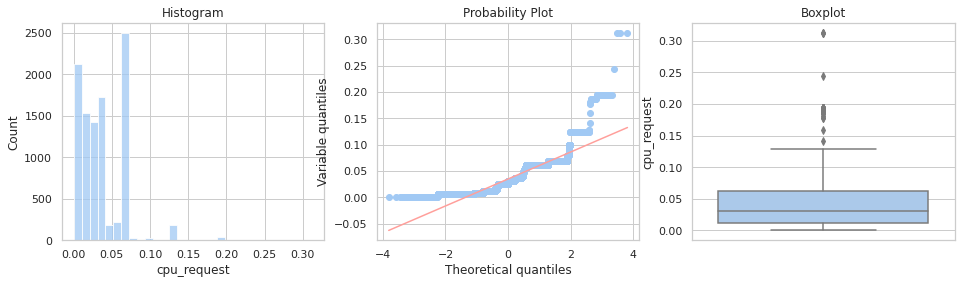

In [22]:
# diagnostic cpu_request

diagnostic_plots(df1, 'cpu_request')

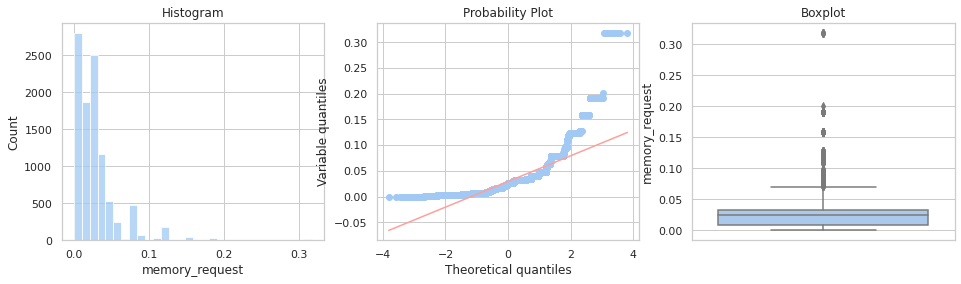

In [23]:
# diagnostic memory_request

diagnostic_plots(df1, 'memory_request')

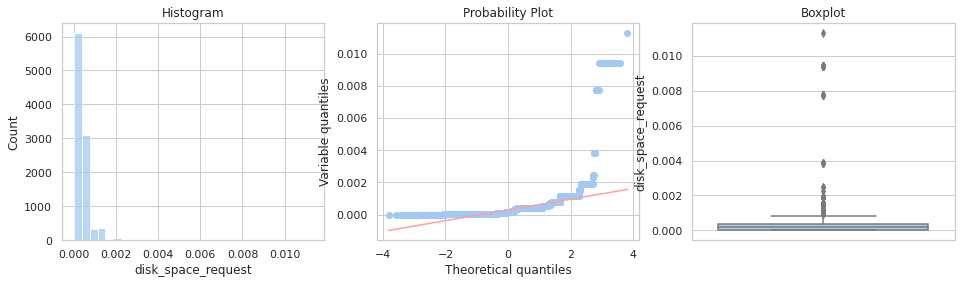

In [24]:
# diagnostic disk_space_request

diagnostic_plots(df1, 'disk_space_request')

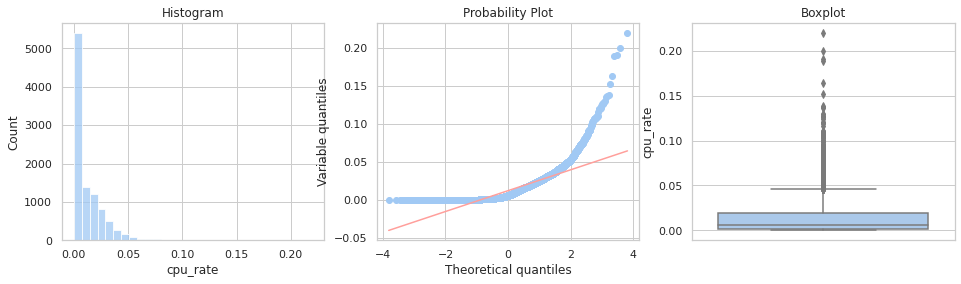

In [25]:
# diagnostic cpu_rate

diagnostic_plots(df1, 'cpu_rate')

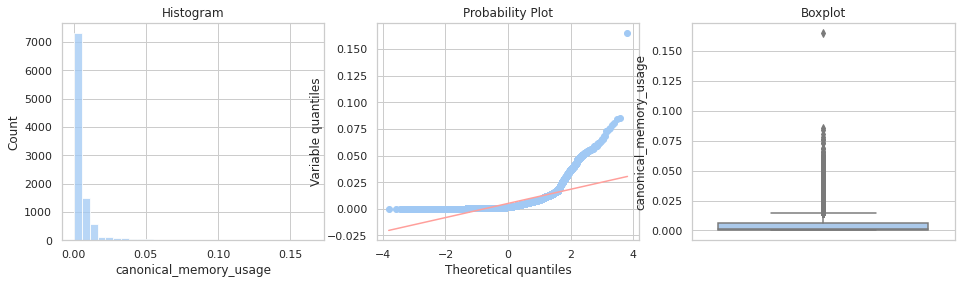

In [26]:
# diagnostic canonical_memory_usage

diagnostic_plots(df1, 'canonical_memory_usage')

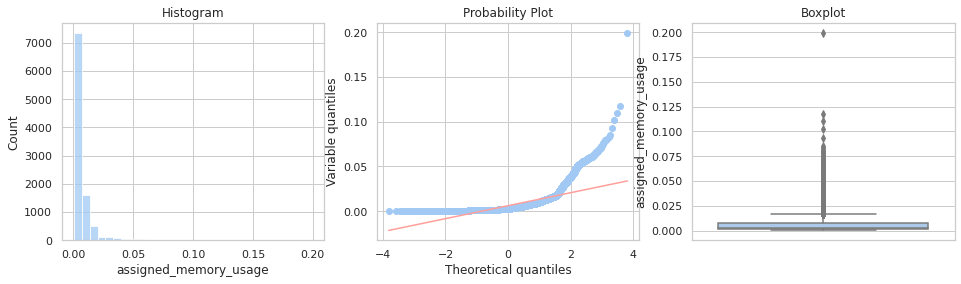

In [27]:
# diagnostic assigned_memory_usage

diagnostic_plots(df1, 'assigned_memory_usage')

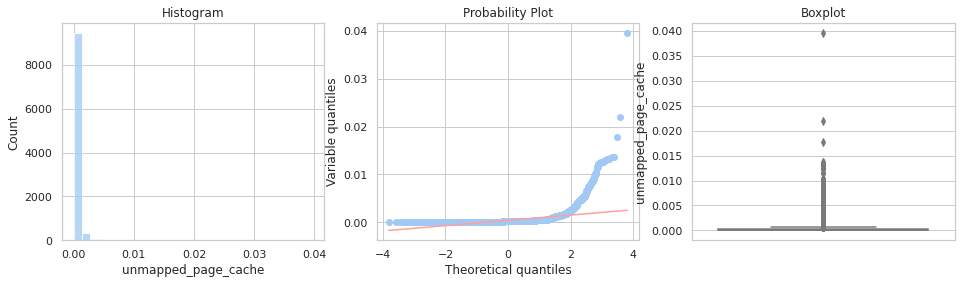

In [28]:
# diagnostic unmapped_page_cache

diagnostic_plots(df1, 'unmapped_page_cache')

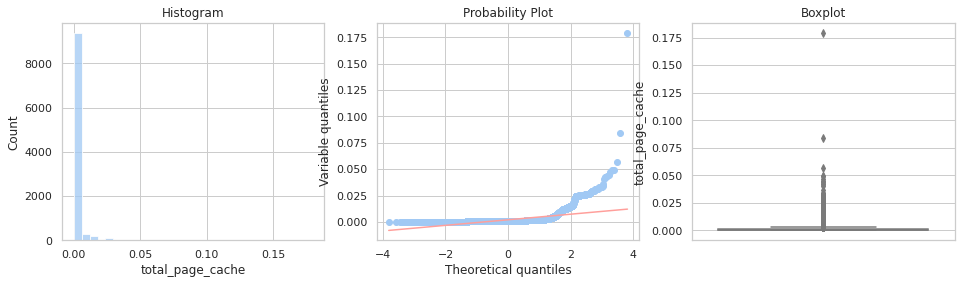

In [29]:
# diagnostic total_page_cache

diagnostic_plots(df1, 'total_page_cache')

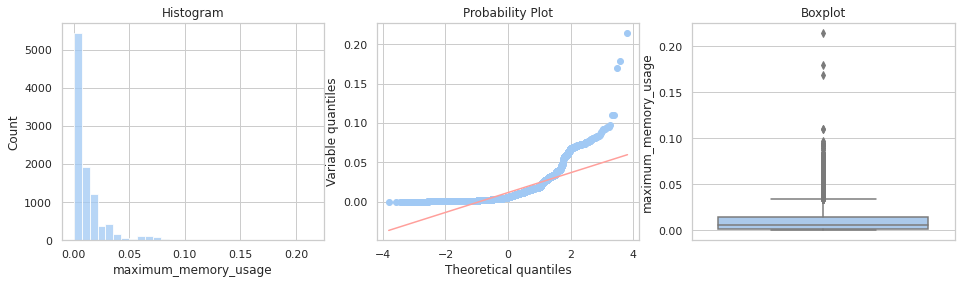

In [30]:
# diagnostic maximum_memory_usage

diagnostic_plots(df1, 'maximum_memory_usage')

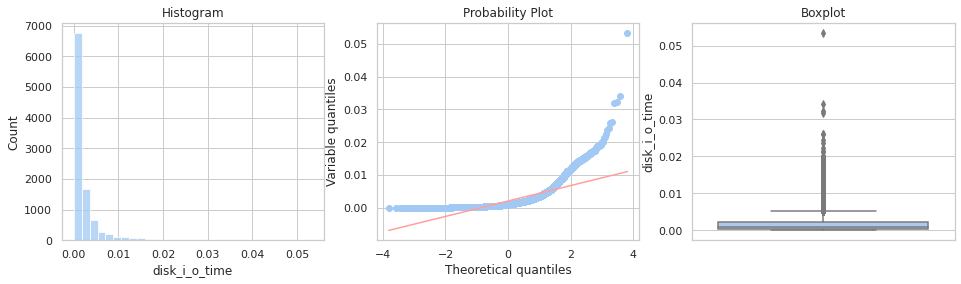

In [31]:
# diagnostic disk_i_o_time

diagnostic_plots(df1, 'disk_i_o_time')

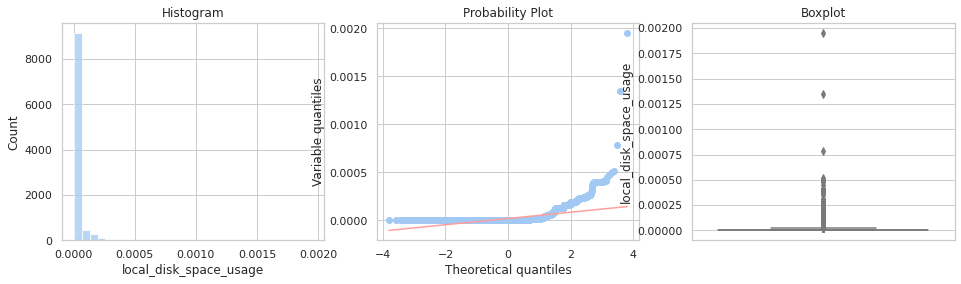

In [32]:
# diagnostic local_disk_space_usage

diagnostic_plots(df1, 'local_disk_space_usage')

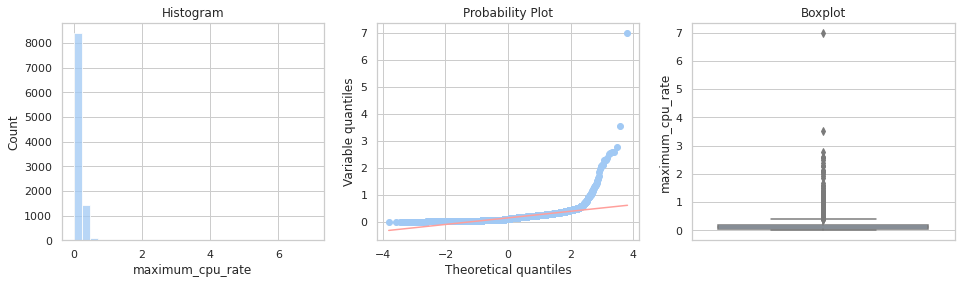

In [33]:
# diagnostic maximum_cpu_rate

diagnostic_plots(df1, 'maximum_cpu_rate')

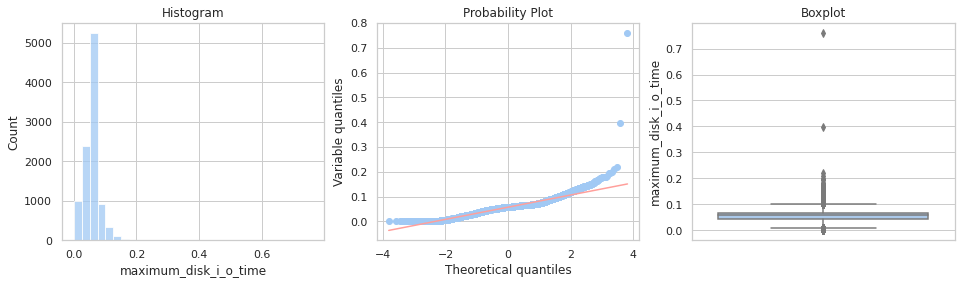

In [34]:
# diagnostic maximum_disk_i_o_time

diagnostic_plots(df1, 'maximum_disk_i_o_time')

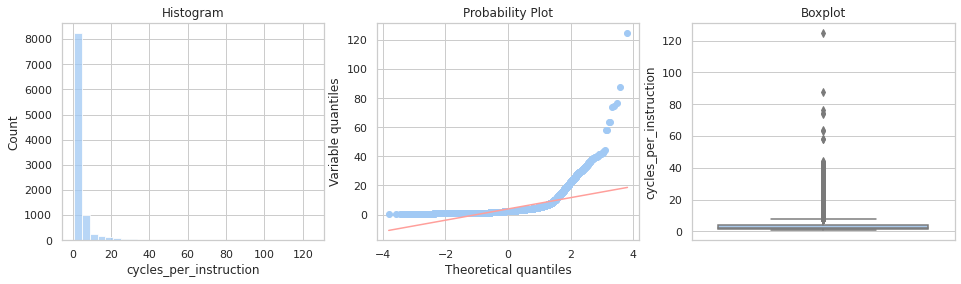

In [35]:
# diagnostic cycles_per_instruction

diagnostic_plots(df1, 'cycles_per_instruction')

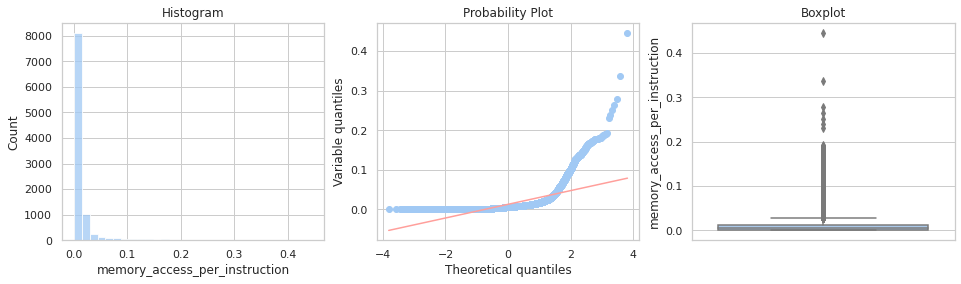

In [36]:
# diagnostic memory_access_per_instruction

diagnostic_plots(df1, 'memory_access_per_instruction')

In [37]:
# calculate the interquantile range

for column in df1:
  IQR = df1[column].quantile(0.75) - df1[column].quantile(0.25)
  lower_boundary = df1[column].quantile(0.25) - (IQR*1.5)
  upper_boundary = df1[column].quantile(0.75) + (IQR*1.5)
  print('IQR for {} = {} - {}'.format(column,upper_boundary,lower_boundary))

IQR for att0 = 38197.625 - -18157.375
IQR for timestamp_ = 884423766973.25 - -192687894986.75
IQR for job_id = 6335619690.0 - 6236272634.0
IQR for task_index = 2497.25 - -1360.75
IQR for machine_id = 3580911013.0 - -2138033351.0
IQR for event_type = 2.5 - -1.5
IQR for scheduling_class = 2.5 - -1.5
IQR for priority = 10.0 - -6.0
IQR for cpu_request = 0.1375 - -0.06250000000000001
IQR for memory_request = 0.071121 - -0.029495
IQR for disk_space_request = 0.0009082750000000001 - -0.0004839250000000001
IQR for different_machine_restriction = 0.0 - 0.0
IQR for cpu_rate = 0.045575884886363646 - -0.025674286931818186
IQR for canonical_memory_usage = 0.01417618005952381 - -0.007638808035714285
IQR for assigned_memory_usage = 0.016292015398550724 - -0.007882209239130434
IQR for unmapped_page_cache = 0.0006159429166666666 - -0.00022217374999999997
IQR for total_page_cache = 0.00277285 - -0.00081075
IQR for maximum_memory_usage = 0.034181500000000004 - -0.017262500000000004
IQR for disk_i_o_time 

*  IQR calculated for each feature.
*  Values which located outside of these ranges treated as outlier.

*  As mentioned earlier, to treat the outliers, the maximum and minimum values are capped using upper_boundary and lower_boundary. 
*  To use this method, feature_engine package was installed, to import Winsorizer.
*  As indicated in the coding, the maximum and minimum values for all features being capped using IQR.

In [38]:
# use censor method, cap the upper and lower outlier 
# IQR method is used for outlier detection

!pip install feature_engine
from feature_engine.outliers import Winsorizer

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['att0','timestamp_','job_id','task_index','machine_id','priority','cpu_request','memory_request',
                                     'disk_space_request','cpu_rate','canonical_memory_usage','assigned_memory_usage',
                                     'unmapped_page_cache','total_page_cache','maximum_memory_usage','disk_i_o_time','local_disk_space_usage','maximum_cpu_rate',
                                     'maximum_disk_i_o_time','cycles_per_instruction','memory_access_per_instruction'])
windsoriser.fit(df1)

     |████████████████████████████████| 205 kB 5.1 MB/s 
     |████████████████████████████████| 9.8 MB 48.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['att0', 'timestamp_', 'job_id', 'task_index',
                      'machine_id', 'priority', 'cpu_request', 'memory_request',
                      'disk_space_request', 'cpu_rate',
                      'canonical_memory_usage', 'assigned_memory_usage',
                      'unmapped_page_cache', 'total_page_cache',
                      'maximum_memory_usage', 'disk_i_o_time',
                      'local_disk_space_usage', 'maximum_cpu_rate',
                      'maximum_disk_i_o_time', 'cycles_per_instruction',
                      'memory_access_per_instruction'])

*  The modified dataframe, df1 being save to new object, df1_t

In [39]:
df1_t = windsoriser.transform(df1)

*  The features visualized again after the outliers treatment.

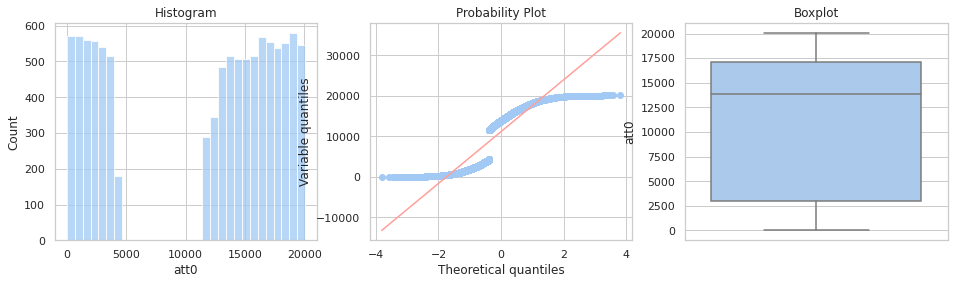

In [40]:
diagnostic_plots(df1_t, 'att0')

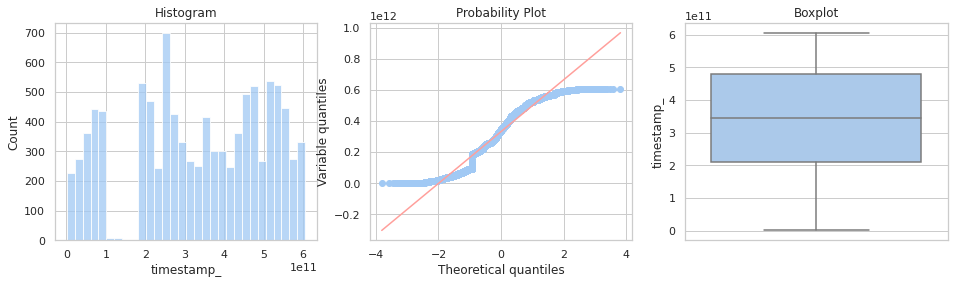

In [41]:
diagnostic_plots(df1_t, 'timestamp_')

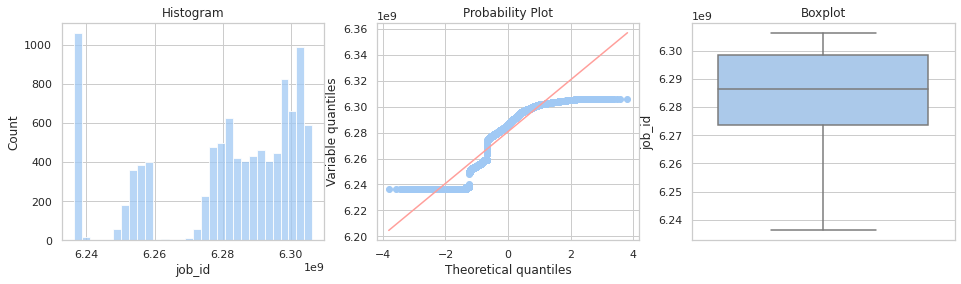

In [42]:
diagnostic_plots(df1_t, 'job_id')

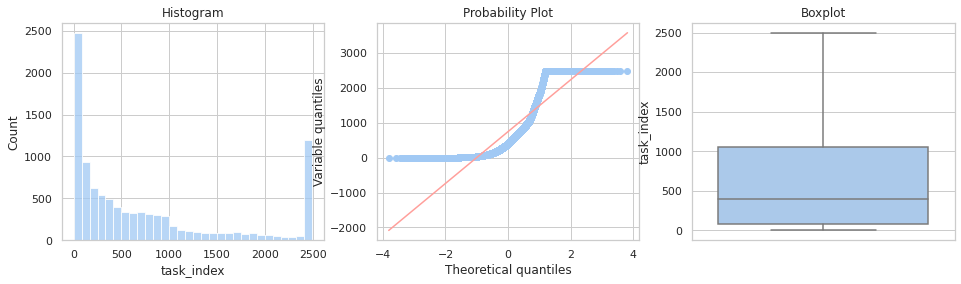

In [43]:
diagnostic_plots(df1_t, 'task_index')

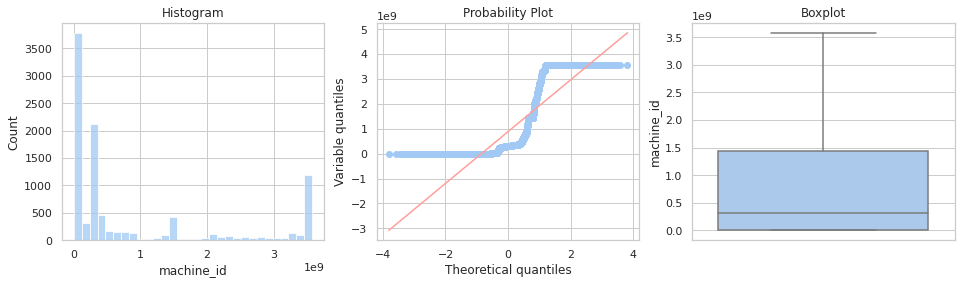

In [44]:
diagnostic_plots(df1_t, 'machine_id')

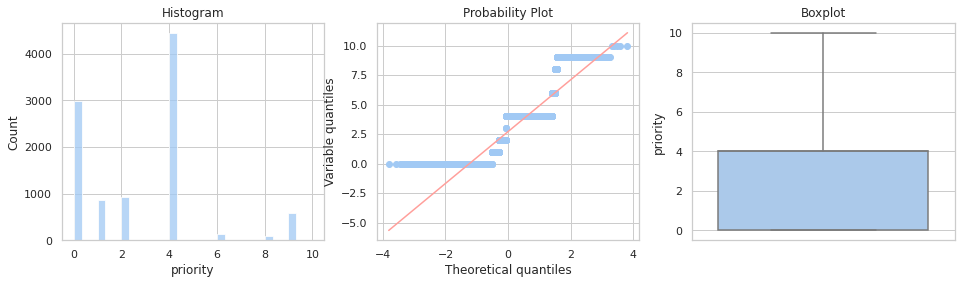

In [45]:
diagnostic_plots(df1_t, 'priority')

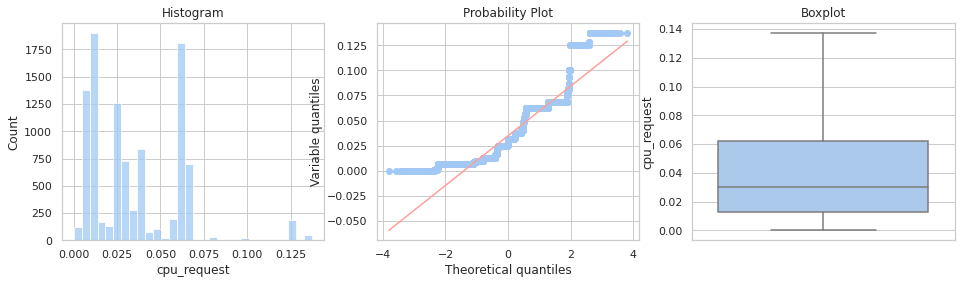

In [46]:
diagnostic_plots(df1_t, 'cpu_request')

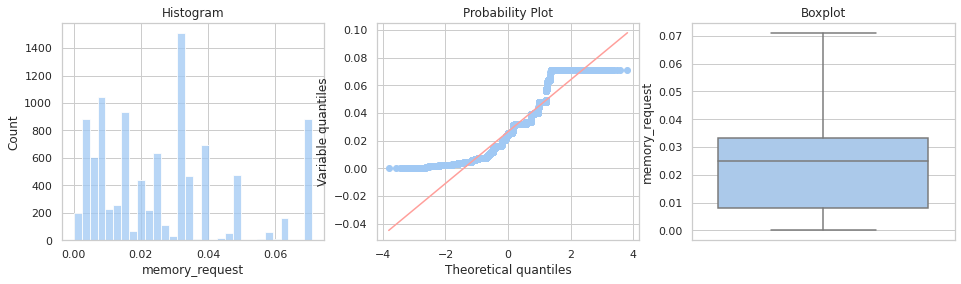

In [47]:
diagnostic_plots(df1_t, 'memory_request')

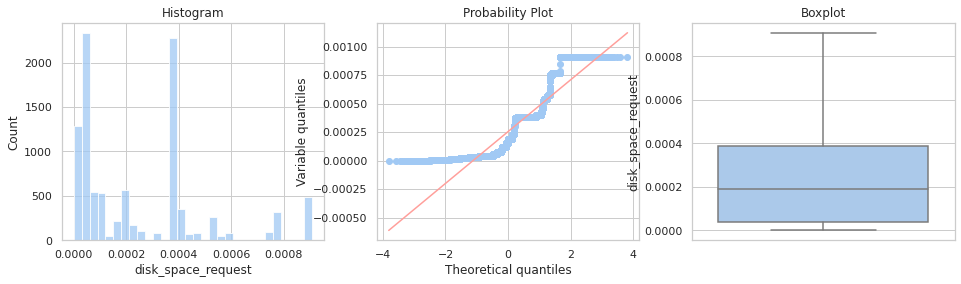

In [48]:
diagnostic_plots(df1_t, 'disk_space_request')

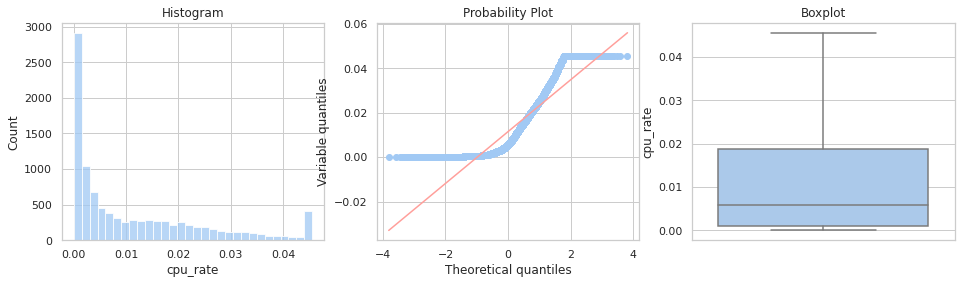

In [49]:
diagnostic_plots(df1_t, 'cpu_rate')

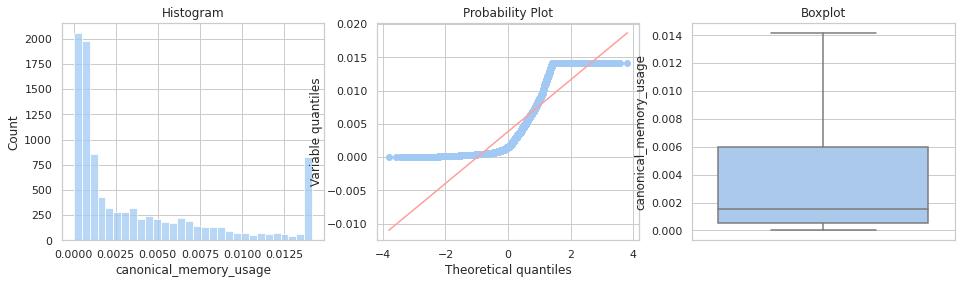

In [50]:
diagnostic_plots(df1_t, 'canonical_memory_usage')

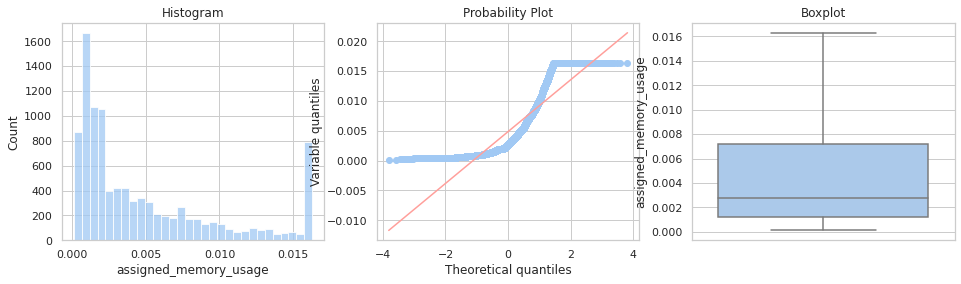

In [51]:
diagnostic_plots(df1_t, 'assigned_memory_usage')

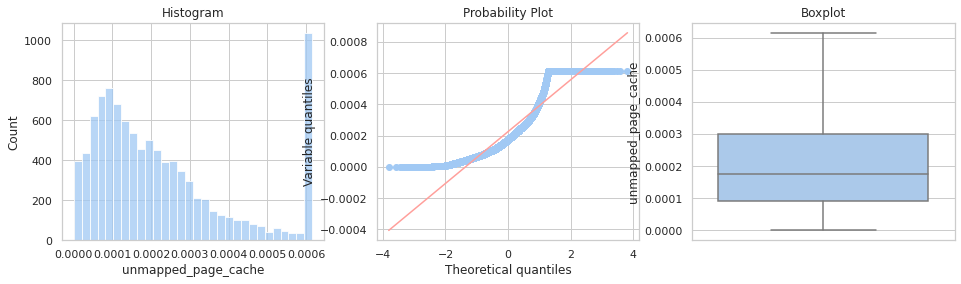

In [52]:
diagnostic_plots(df1_t, 'unmapped_page_cache')

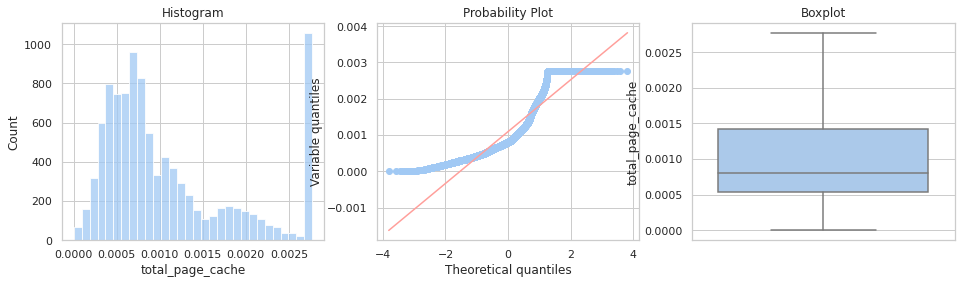

In [53]:
diagnostic_plots(df1_t, 'total_page_cache')

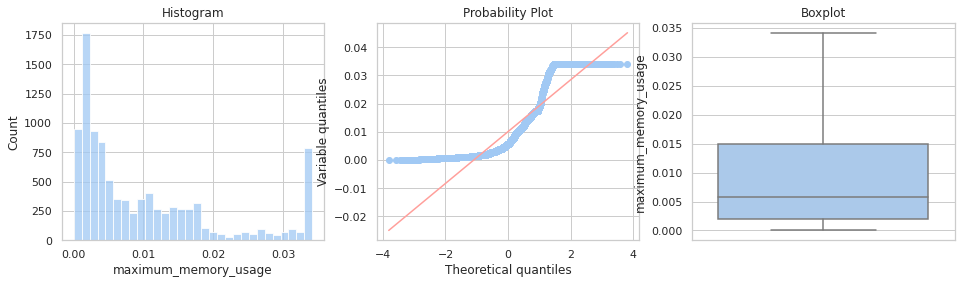

In [54]:
diagnostic_plots(df1_t, 'maximum_memory_usage')

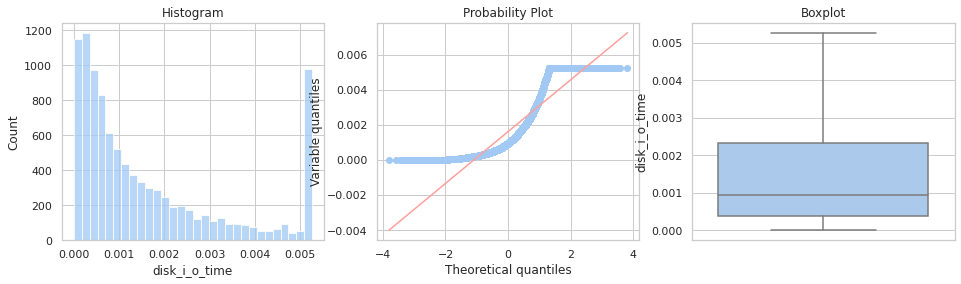

In [55]:
diagnostic_plots(df1_t, 'disk_i_o_time')

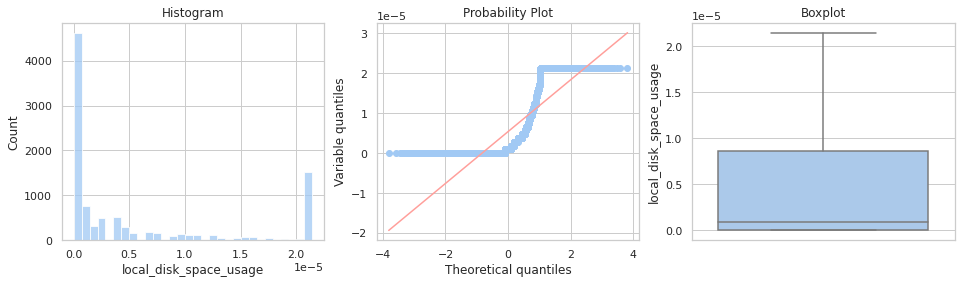

In [56]:
diagnostic_plots(df1_t, 'local_disk_space_usage')

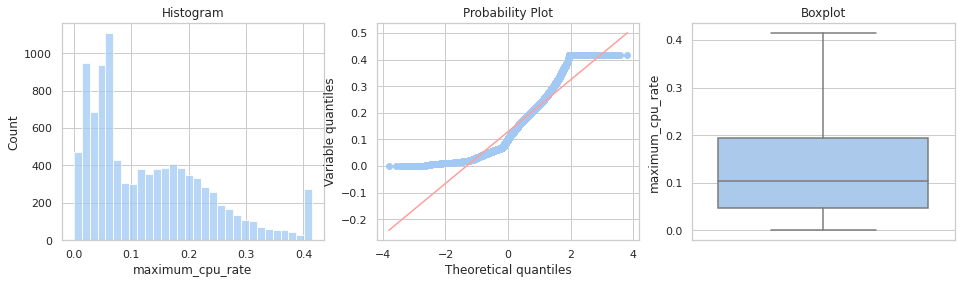

In [57]:
diagnostic_plots(df1_t, 'maximum_cpu_rate')

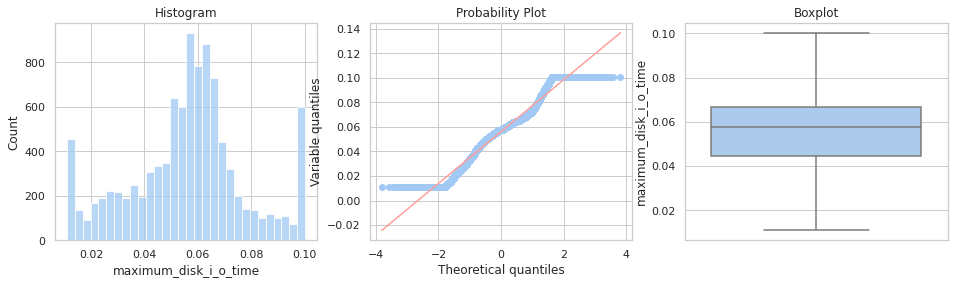

In [58]:
diagnostic_plots(df1_t, 'maximum_disk_i_o_time')

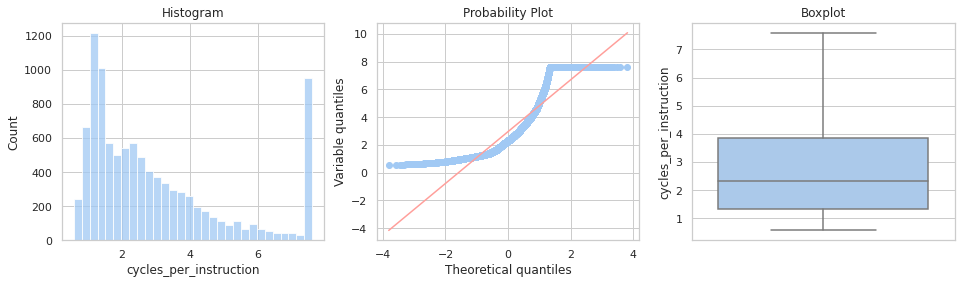

In [59]:
diagnostic_plots(df1_t, 'cycles_per_instruction')

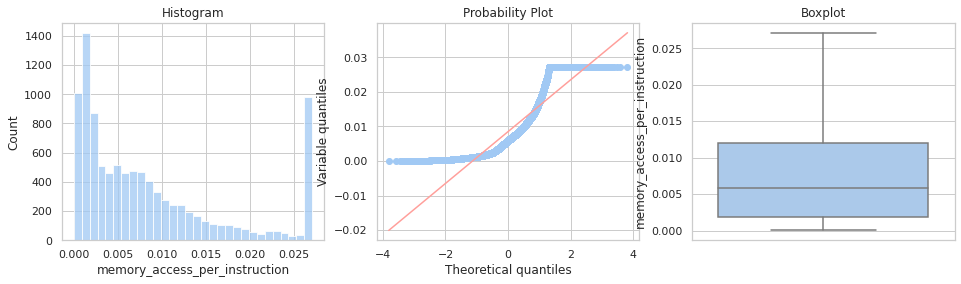

In [60]:
diagnostic_plots(df1_t, 'memory_access_per_instruction')

*  From the boxplots, it can be observed that the outliers not exist anymore because the values are capped at the upper_boundary. 
*  These were visualized in Q-Q plot, where the maximum value curves become flat. 
*  This shows that, the outlier values eliminated and capped at the upper_boundary values.

*  Data from all features are scaled between 0 and 1 using MinMaxScaler. This is because the data in each feature has huge difference. 
*  For example, values of data in timestamp_ are large compare to canonical_memory_usage, which create unbalanced values among the data. 
*  This will affect the accuracy of the modeling, and need to be transformed. Below are the codes for data transformation.

In [61]:
# scaling all the attributes using minmaxscaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['att0','timestamp_','task_index','machine_id','priority','cpu_request','memory_request',
            'disk_space_request','cpu_rate','canonical_memory_usage','unmapped_page_cache',
            'total_page_cache','disk_i_o_time','local_disk_space_usage','maximum_cpu_rate',
            'maximum_disk_i_o_time','cycles_per_instruction']
df1_t[num_vars] = scaler.fit_transform(df1_t[num_vars])
df1_t.head()

,att0,timestamp_,job_id,task_index,machine_id,event_type,scheduling_class,priority,cpu_request,memory_request,disk_space_request,different_machine_restriction,cpu_rate,canonical_memory_usage,assigned_memory_usage,unmapped_page_cache,total_page_cache,maximum_memory_usage,disk_i_o_time,local_disk_space_usage,maximum_cpu_rate,maximum_disk_i_o_time,cycles_per_instruction,memory_access_per_instruction
0,0.571564,0.323034,6.275744e+09,0.173791,0.120373,0.0,0.0,0.1,0.454545,0.447118,0.212050,0.0,0.120327,0.113557,0.002653,0.535407,0.369295,0.003304,0.092867,0.044446,0.180972,0.180730,1.000000,0.027127
1,0.571614,0.323118,6.276130e+09,0.043648,0.098205,1.0,0.0,0.0,0.045440,0.058128,0.425202,0.0,0.023178,0.021797,0.000486,0.042439,0.186415,0.002167,0.073094,0.000000,0.122182,0.566249,0.415552,0.012718
2,0.571663,0.306648,6.258695e+09,0.042447,0.000355,0.0,1.0,0.9,0.499855,1.000000,0.064044,0.0,0.064687,0.031344,0.001938,0.357122,0.375065,0.003075,1.000000,0.133333,0.112937,0.629141,0.091293,0.001874
3,0.571763,0.306876,6.274750e+09,0.163380,0.000253,0.0,0.0,0.0,0.363564,0.671105,0.085051,0.0,1.000000,1.000000,0.016292,0.857763,0.654922,0.034182,0.318697,0.400000,1.000000,0.633169,0.052683,0.000607
4,0.571813,0.306900,6.236273e+09,0.147362,0.058062,0.0,0.0,0.0,0.090909,0.109196,0.445240,0.0,0.004505,0.092784,0.001797,0.307110,0.193988,0.001869,0.069476,0.000000,0.038499,0.389436,0.591828,0.016459


*  Feature selection in this study is carried out using Filter Method, where selection using Correlation Matrix and Variance Inflation Factor (VIF) applied. *  Using Correlation Matrix, independent variables which have correlation higer than +/- 0.7 being removed, to ensure more accurate mathematical modelling can be produced. 
*  The selection is further refined using VIF, where multicollinearity is checked and features which have VIF higher than 10 will be removed. 

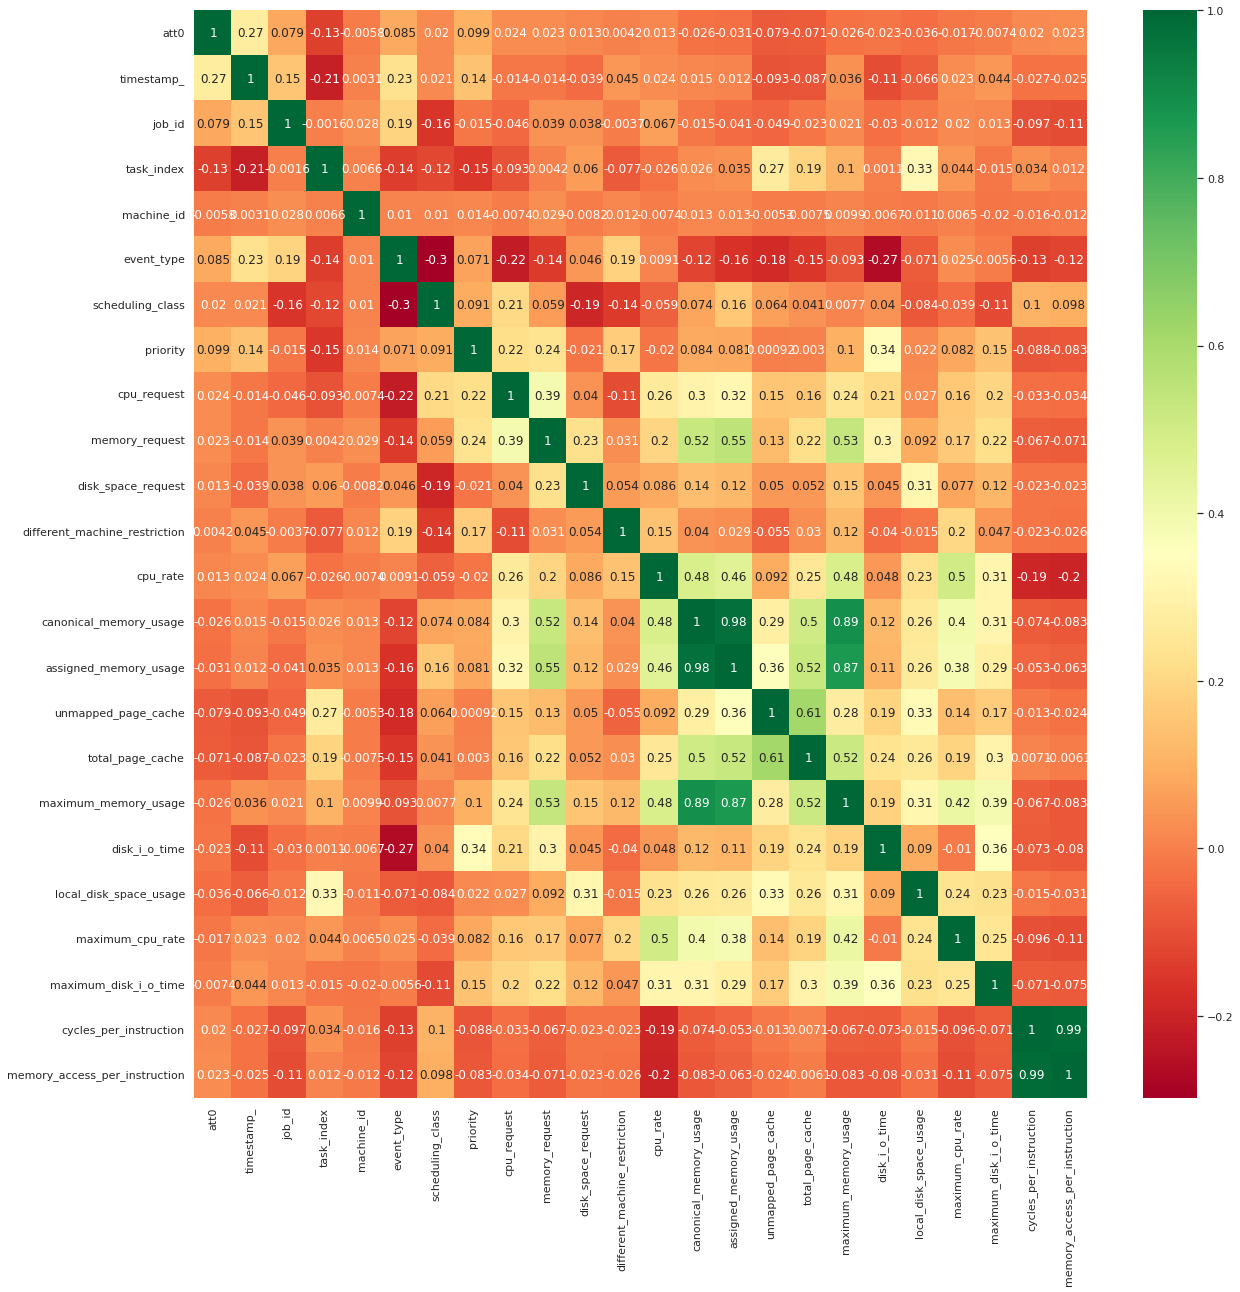

In [62]:
#get correlations of each features in dataset

corrmat = df1_t.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
mask = np.triu(np.ones_like(corrmat, dtype=bool))
g=sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

*  As shown in the correlation matrix, the correlation between independent variables ranges from -0.3 to 1.0. As a rule of thumb, the correlation considered strong when the values exceed ± 0.7. If there are strong correlations exist, one of the features needs to be removed to avoid multicollinearity among independent variables. 

*  Maximum negative correlation observed is -0.3, which mean there are no strong negative correlation. However, for positive correlation, there are values exceed 0.7, for example correlation between assigned_memory_usage and canonical_memory_usage that has value 0.98. Another examples are between maximum_memory_usage and canonical_memory_usage, maximum_memory_usage and assigned_memory_usage, memory_access_per_instruction and cycles_per_instruction, which have 0.89, 0.87 and 0.99. 

In [63]:
# Drop highly correlated features and Meaningless feature
#job_id
# memory_access_per_instruction
# maximum_memory_usage
# assigned_memory_usage

df1_t = df1_t.drop(['job_id','memory_access_per_instruction','maximum_memory_usage','assigned_memory_usage'], axis=1)
print(df1_t.columns)

Index(['att0', 'timestamp_', 'task_index', 'machine_id', 'event_type',
       'scheduling_class', 'priority', 'cpu_request', 'memory_request',
       'disk_space_request', 'different_machine_restriction', 'cpu_rate',
       'canonical_memory_usage', 'unmapped_page_cache', 'total_page_cache',
       'disk_i_o_time', 'local_disk_space_usage', 'maximum_cpu_rate',
       'maximum_disk_i_o_time', 'cycles_per_instruction'],
      dtype='object')



*  Thus, in this case, memory_access_per_instruction, maximum_memory_usage and assigned_memory_usage are removed, including job_id as the id does not bring any influence in modelling calculation. The selected features from correlation matrix analysis are passed to Variance Inflation Factor (VIF) for further analysis.

In [64]:
#separating dependent and independent variables

X = df1_t.iloc[:,[0,1,2,3,6,7,8,9,10,11,12,13,14,15,16,17,18,19]]
y = df1_t.iloc[:, 4]
print(y)

0       0.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    0.0
9998    1.0
9999    0.0
Name: event_type, Length: 10000, dtype: float64


*  Before the multicollinearity analysis carried out, independent variables (X) and target variable (y) being separated.

In [65]:
# checking multicollinearity (more than 10 will be considered to be dropped due to big sample)

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,3.7,att0
1,4.6,timestamp_
2,2.1,task_index
3,1.5,machine_id
4,3.2,priority
5,4.0,cpu_request
6,5.8,memory_request
7,2.6,disk_space_request
8,1.6,different_machine_restriction
9,4.8,cpu_rate


*  VIF of all features are checked in order verify whether multicollinearity exists in the dataset. 
*  As a rule of thumb, a feature which has VIF value more than 10 indicates high multicollinearity. 
*  In this coding, VIF is calculated using variance_inflation_factor imported statsmodels.stats.outliers_influence package. 
*  As shown in the figure, unmapped_page_cache and total_page_cache have VF values 10.8 and 11.6 respectively. 
*  These features’ VIF are outside acceptable range and need to be removed to eliminate multicollinearity.

In [66]:
X = X.drop(['unmapped_page_cache', 'total_page_cache',], axis=1)
print(X.columns)

Index(['att0', 'timestamp_', 'task_index', 'machine_id', 'priority',
       'cpu_request', 'memory_request', 'disk_space_request',
       'different_machine_restriction', 'cpu_rate', 'canonical_memory_usage',
       'disk_i_o_time', 'local_disk_space_usage', 'maximum_cpu_rate',
       'maximum_disk_i_o_time', 'cycles_per_instruction'],
      dtype='object')


In [67]:
# Recalculate VIF
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,3.7,att0
1,4.6,timestamp_
2,2.1,task_index
3,1.5,machine_id
4,3.1,priority
5,3.8,cpu_request
6,5.7,memory_request
7,2.6,disk_space_request
8,1.5,different_machine_restriction
9,4.8,cpu_rate


*  After removal of the said features, VIF values recalculated, and no feature has VIF value larger than 10. 
*  Thus, these features will be used in the modelling development.

*  Next, target variable, which is event_type will be counted between 1 and 0, the values represent successful task and failed task respectively. 

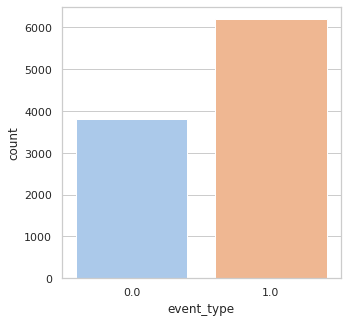

In [68]:
# check whether target variable (event_type) imbalance

fig=plt.figure(figsize=(5,5))
sns.countplot(data=df1_t, x="event_type")
plt.show()

*  It is observed that there are differences between amount of 0 and 1. 
*  This condition need to be rectified as imbalanced target variable might result in misleading performance estimations. 
*  This condition may lead to inaccurate conclusions about the algorithm's relevance in outperforming chance.
*  Synthetic Minority Oversampling Technique (SMOTE) is used, to create new datapoints by interpolation of several minority class datapoints which lie nearby to each other. 

In [69]:
# SMOTE for treating imbalanced data

!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')
print(f'''Shape of y before SMOTE: {y.shape}
Shape of y after SMOTE: {y_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (10000, 16)
Shape of X after SMOTE: (12376, 16)
Shape of y before SMOTE: (10000,)
Shape of y after SMOTE: (12376,)

Balance of positive and negative classes (%):


0.0    50.0
1.0    50.0
Name: event_type, dtype: float64

*  imbalanced-learn package which contains imblearn.over_sampling installed, and SMOTE is imported. 
*  Independent variables and target variables fitted into SMOTE and resampled. It is in SMOTE where the calculation of kNN carried out to create synthetic data points for minority sample as discussed previously. 
*  Finally, the both classes are count to ensure they balanced.

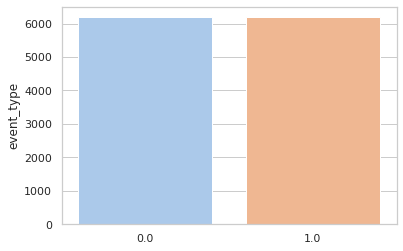

In [70]:
#Re-checking the amount of target variable

sns.barplot(x=y_sm.value_counts().index, y=y_sm.value_counts())

*  Based on the barplot, the target variable is now balanced, between success and fail tasks.

In [71]:
frames = [X_sm,y_sm]
df1_ts = pd.concat(frames, axis=1)

*  The new data which being SMOTE is consolidated by concatination using pd.concat, by column (axis = 1).
*  New dataframe, df1_ts being saved.

In [72]:
#final data to be fed into model

df1_ts

,att0,timestamp_,task_index,machine_id,priority,cpu_request,memory_request,disk_space_request,different_machine_restriction,cpu_rate,canonical_memory_usage,disk_i_o_time,local_disk_space_usage,maximum_cpu_rate,maximum_disk_i_o_time,cycles_per_instruction,event_type
0,0.571564,0.323034,0.173791,0.120373,0.100000,0.454545,0.447118,0.212050,0.0,0.120327,0.113557,0.092867,0.044446,0.180972,0.180730,1.000000,0.0
1,0.571614,0.323118,0.043648,0.098205,0.000000,0.045440,0.058128,0.425202,0.0,0.023178,0.021797,0.073094,0.000000,0.122182,0.566249,0.415552,1.0
2,0.571663,0.306648,0.042447,0.000355,0.900000,0.499855,1.000000,0.064044,0.0,0.064687,0.031344,1.000000,0.133333,0.112937,0.629141,0.091293,0.0
3,0.571763,0.306876,0.163380,0.000253,0.000000,0.363564,0.671105,0.085051,0.0,1.000000,1.000000,0.318697,0.400000,1.000000,0.633169,0.052683,0.0
4,0.571813,0.306900,0.147362,0.058062,0.000000,0.090909,0.109196,0.445240,0.0,0.004505,0.092784,0.069476,0.000000,0.038499,0.389436,0.591828,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12371,0.916029,0.779580,0.116240,0.000307,0.000000,0.454545,0.131075,0.020996,0.0,0.009223,0.017132,0.060970,0.000000,0.045901,0.071137,0.305931,0.0
12372,0.197394,0.146250,1.000000,0.048878,0.000000,0.090909,0.223552,0.445240,0.0,0.059121,0.187537,0.568069,1.000000,0.235464,0.909525,0.353578,0.0
12373,0.144018,0.083881,1.000000,0.093787,0.000000,0.090909,0.223552,0.445240,0.0,0.026255,0.106117,0.201818,1.000000,0.294649,0.491284,0.545518,0.0
12374,0.195870,0.145212,0.064983,0.000289,0.000000,0.036257,0.066640,0.037750,0.0,0.004966,0.052827,0.071252,0.000000,0.048578,0.446441,1.000000,0.0


In [73]:
# saving the dataframe to .csv
df1_ts.to_csv('Group_Project_DSC761_FeatureEngineering_VIF_300122-outlier_treated_SMOTE.csv', index=False)

*  Finally, the prepared dataset being saved, to be used for modelling purposes.